In [1]:
import Pkg 
Pkg.status()
import ForwardDiff as fd
using Plots




      Status `~/.julia/environments/v1.6/Project.toml`
  [f6369f11] ForwardDiff v0.10.35
  [7073ff75] IJulia v1.24.0
  [91a5bcdd] Plots v1.38.17
  [d330b81b] PyPlot v2.11.1


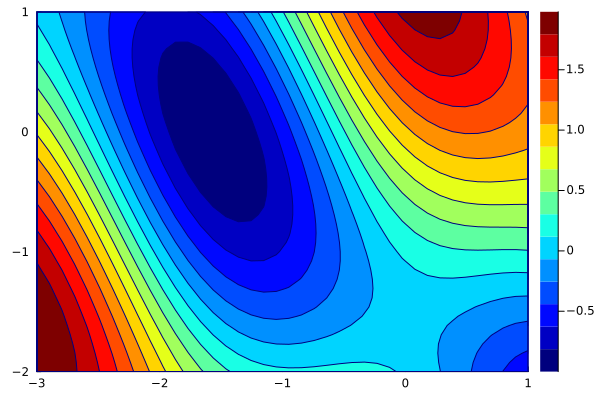

In [2]:
#visualisation of gradients
g(x) = [cos(x[1] + x[2]) - 2*cos(x[1])*sin(x[1]); cos(x[1] + x[2])]
f(x)=sin(x[1]+x[2])+cos(x[1])^2
#f(x1,x2)=sin(x1+x2)+cos(x1)^2


f(x1,x2)=f([x1,x2])

xs=range(-3,1,length=40)
ys=range(-2,1,length=40)

contourf(xs,ys,f,color=:jet)

In [15]:
finite_difference(f, x::Real, h=1e-8) = (f(x+h) - f(x)) / h

x = [-2; -1]
fin_diff(h) = finite_difference(y -> f(x[1], y), x[2], h=h)

fin_diff (generic function with 1 method)

In [16]:
true_grad=g([-2,-1])[2]

-0.9899924966004454

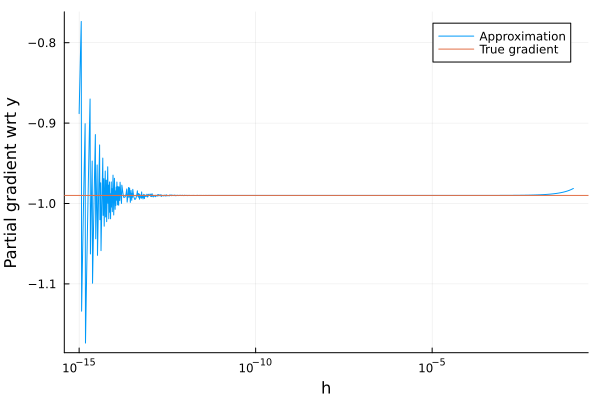

In [29]:
hs = 10. .^ (-15:0.01:-1)

plot(hs, fin_diff,
    xlabel = "h",
    ylabel = "Partial gradient wrt y",
    label = "Approximation",
    xscale = :log10,
)
hline!([true_grad]; label =  "True gradient")



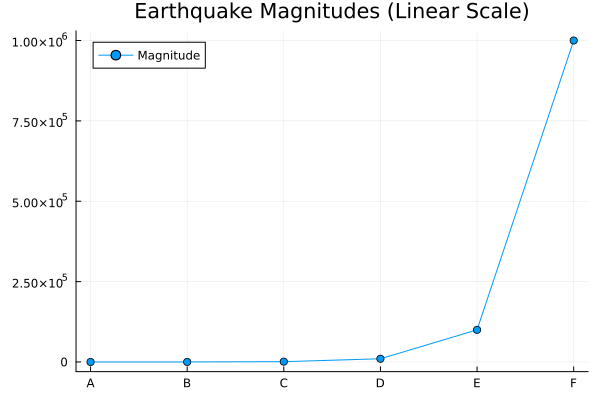

In [43]:
using Plots

# Data
locations = ["A", "B", "C", "D", "E", "F"]
magnitudes = [10.0, 100, 1000, 10000, 100000, 1000000]

plot(locations, magnitudes, label="Magnitude", marker=:circle, legend=:topleft, title="Earthquake Magnitudes (Linear Scale)")


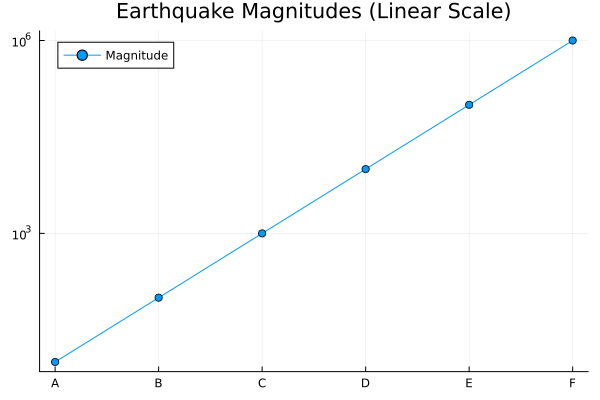

In [44]:
plot(locations, magnitudes, label="Magnitude", marker=:circle, legend=:topleft,yscale=:log10, title="Earthquake Magnitudes (Linear Scale)")


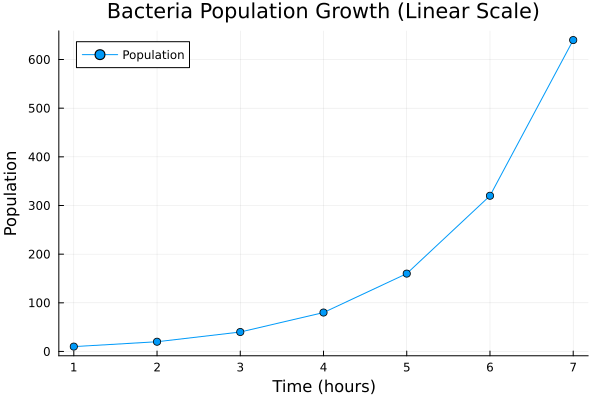

In [46]:
# Data
time_hours = [1, 2, 3, 4, 5, 6, 7]
population = [10, 20, 40, 80, 160, 320, 640]

# Plot using linear scale
plot(time_hours, population, label="Population", marker=:circle, legend=:topleft, title="Bacteria Population Growth (Linear Scale)", xlabel="Time (hours)", ylabel="Population")



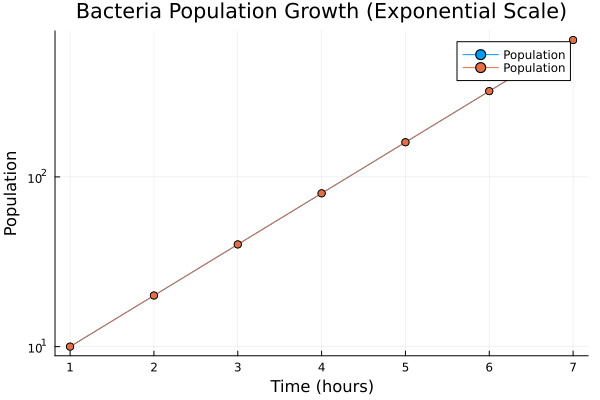

In [47]:
# Plot using exponential (logarithmic) scale on the y-axis
plot!(time_hours, population, label="Population", marker=:circle, legend=:topright, yscale=:log10, title="Bacteria Population Growth (Exponential Scale)", xlabel="Time (hours)", ylabel="Population")

In [70]:
#direction of the gradients
x=[-2,-1]
xs=range(-3,1,length=40)
ys=range(-2,1,length=40)

α=0.25
x_grad=[-2,-1]

  


2-element Vector{Int64}:
 -2
 -1

In [72]:
x_update=x.+α.*g(x)
x_grad=hcat(x_grad,x_update)
x=x_update
contourf(xs,ys,f,color=:jet)
plot!(x_grad[end-1,:], x_update;
    line = (:arrow, 4, :black),
    label = "",
)
    





BoundsError: BoundsError: attempt to access 2-element Vector{Float64} at index [1:3]

y is greater